# Python Group
## Wali Chaudhary, Bryce Shurts, & Alex Wright

## 1. Business Understanding

The Hotels Reservation dataset was uploaded by Ahsan Raza on kaggle in an effort to discover patterns in online-booking tendencies of hotel customers. Specifically, if a customer would honor the reservation or if they would eventually cancel it. The data was collected from a single country which cannot be disclosed for privacy reasons as stated by Ahsan in the Kaggle discussion posts.

The datasets description states there have been major issues in the hotel industry in regard to consumer online booking activity. The convenience and low to little cost of cancelling an online-booking has led to a significant change in consumer behavior. There are a larger number of cancellations and rescheduling due to changes of plans, scheduling conflicts, and other unforeseen circumstances. Ahsan describes this convenient cancellation feature as beneficial to hotel guests, but less desirable and possible revenue diminishing for hotels.

One can use this dataset to predict if a consumer will honor their reservation or not. Parties that may be interested in the classification result may be those employed in Hotel Management, or management from any industry that deals with an online reservation system such as restaurants, resorts, or motels. A hotel manager will be able to gain insight as to why certain customers may be more prone to online cancelling and may make better estimations regarding hotel occupancy.

### 1.1 Measure of Success

So, what defines a successful machine learning algorithm?
Due to the non-critical nature of hotel cancellations, it is safe to assume that a good model should be able to predict more accurately than random occurrence (50/50). For a business with a more aggressive strategy to produce profit, baseline of 80% for the classification rate may be ideal.


## 2. Data Understanding

The dataset contains 19 features, 14 numerical (continuous/discrete) and 5 categorical (nominal/ordinal), which can be broken down as such:

- Booking_ID: Qualitative, discrete, & nominal feature; one-hot encoded integer repersentation
- no_of_adults: Quantitative, continuous, & ratio feature; integer repersentation
- no_of_children: Quantitative, continuous, & ratio feature; integer repersentation
- no_of_weekend_nights: Quantitative, continuous, & ratio feature; integer repersentation
- no_of_week_nights: Quantitative, continuous, & ratio feature; integer repersentation
- type_of_meal_plan: Qualitative, discrete, & ordinal feature; integer repersentation
- required_car_parking_space: Qualitative, discrete, & nominal feature; binary repersentation
- room_type_reserved: Qualitative, discrete, & ordinal feature; integer repersentation
- lead_time: Quantitative, continuous, & ratio feature; integer repersentation
- arrival_year: Qualitative, discrete, & ordinal feature; integer repersentation
- arrival_month: Qualitative, discrete, & ordinal feature; integer repersentation
- arrival_date: Qualitative, discrete, & ordinal feature; integer repersentation
**Could be argued as nominal depending on how we apply it**
- market_segment_type: Qualitative, discrete, & nominal feature; one-hot encoded integer repersentation
**Maybe it could be argued as ordinal? Not sure if there's really a clear hierarchy in the data**
- repeated_guest: Qualitative, discrete, & nominal feature; binary repersentation
- no_of_previous_cancellations: Quantitative, continuous, & ratio feature; integer repersentation
- no_of_previous_bookings_not_canceled: Quantitative, continuous, & ratio feature; integer repersentation
- avg_price_per_room: Quantitative, continuous, & ratio feature; float repersentation
- no_of_special_requests: Quantitative, continuous, & ratio feature; integer repersentation
- booking_status: Qualitative, discrete, & nominal feature; binary repersentation

<sub> Plain english feature definitions can be sourced from the original's dataset listing at https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset in the Details section </sub>

In [31]:
import pandas as pd
import numpy as np

# Typings
from pandas import ( DataFrame, Series )
from numpy import ndarray

df: DataFrame = pd.read_csv("Hotel Reservations.csv")

### 2.1 Data Description

In [8]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [9]:
# Define data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### Get some statistics about the data set

In [32]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


### 2.2 Data Quality

After analyzing the data in the following graphs, we find that there is no missing data and that nothing will need to be imputed into our dataset.

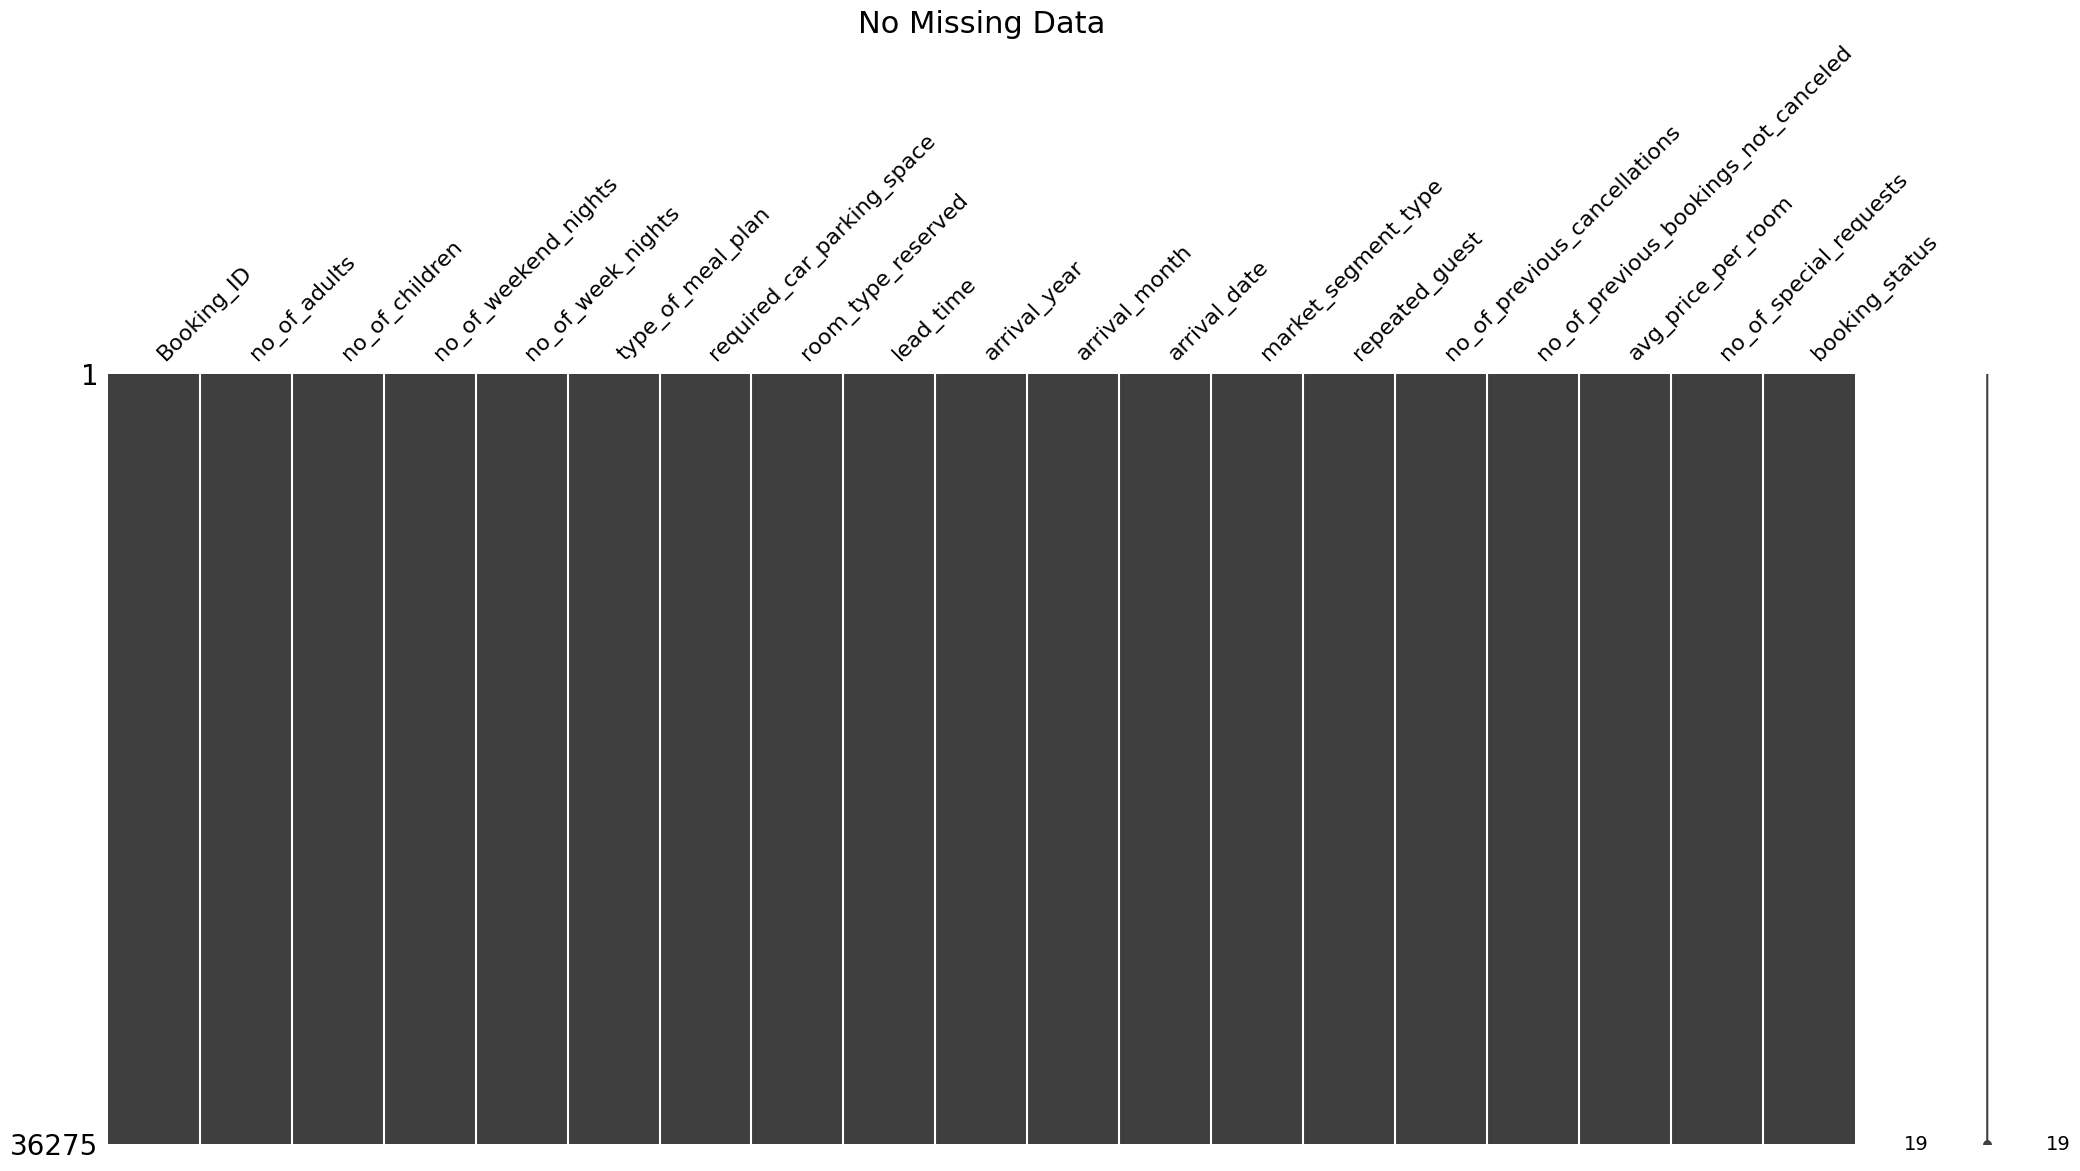

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
import pandas as pd

warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
import missingno as mn

df = pd.read_csv("Hotel Reservations.csv")
mn.matrix(df)
plt.title("No Missing Data", fontsize=22)
plt.show()


In [13]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

#### Duplicate entries
The dataset labels each entry with a unique ID that is associated with a booking entry by INNHotels, the hotel chain the data was sourced from. As such, we can be confident that the dataset does not contain any duplicate entries, vis-à-vis multiple entries repersenting the same booking. 

#### Formatting data for machine learning

Because the Booking_ID column is different for every single row, it is likely to not have statistical significance as there are no relationships to it besides only from the row it's associated with. We can go ahead and drop it.

In [14]:
df.drop('Booking_ID', axis=1)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [15]:
# Encode class labels

# Find the unique class label values (should be 'Canceled' and
# 'Not Canceled'), and transform the dataframe to include those
bk_status_mapping = {
    label: idx for idx, label in enumerate(np.unique(df.booking_status))
}
df.booking_status: Series = df.booking_status.map(bk_status_mapping)
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0


In [16]:
# Now lets one-hot encode any ordinal categorical features such as
# type_of_meal_plan, room_type_reserved, arrival_year, market_segment_type

# TODO: Wali
# Are months & days also nominal data? Check back on this

# I would say they're ordinal, espeically months: the months have a structure
# that repersents the progression of the seasons which could affect whether
# someone cancels a booking or not (e.g., the later/winter months 11-2 might
# have more cancellations due to bad weather in winter preventing travel).
# Days... could probably be nominal without affecting too much. Could even make
# them interval or ratio depending on the context.
# Just my 2C - Bryce
pd.get_dummies(df[['type_of_meal_plan', 'room_type_reserved', 'arrival_year', 'market_segment_type']])


,arrival_year,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2017,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,2018,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
2,2018,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,2018,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,2018,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,2018,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
36271,2018,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
36272,2018,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
36273,2018,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1


In [17]:
print(df.dtypes)
print('========')
print(df.info())

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 3627

## 3. Data visualization

#### Correlation between different columns

<AxesSubplot: >

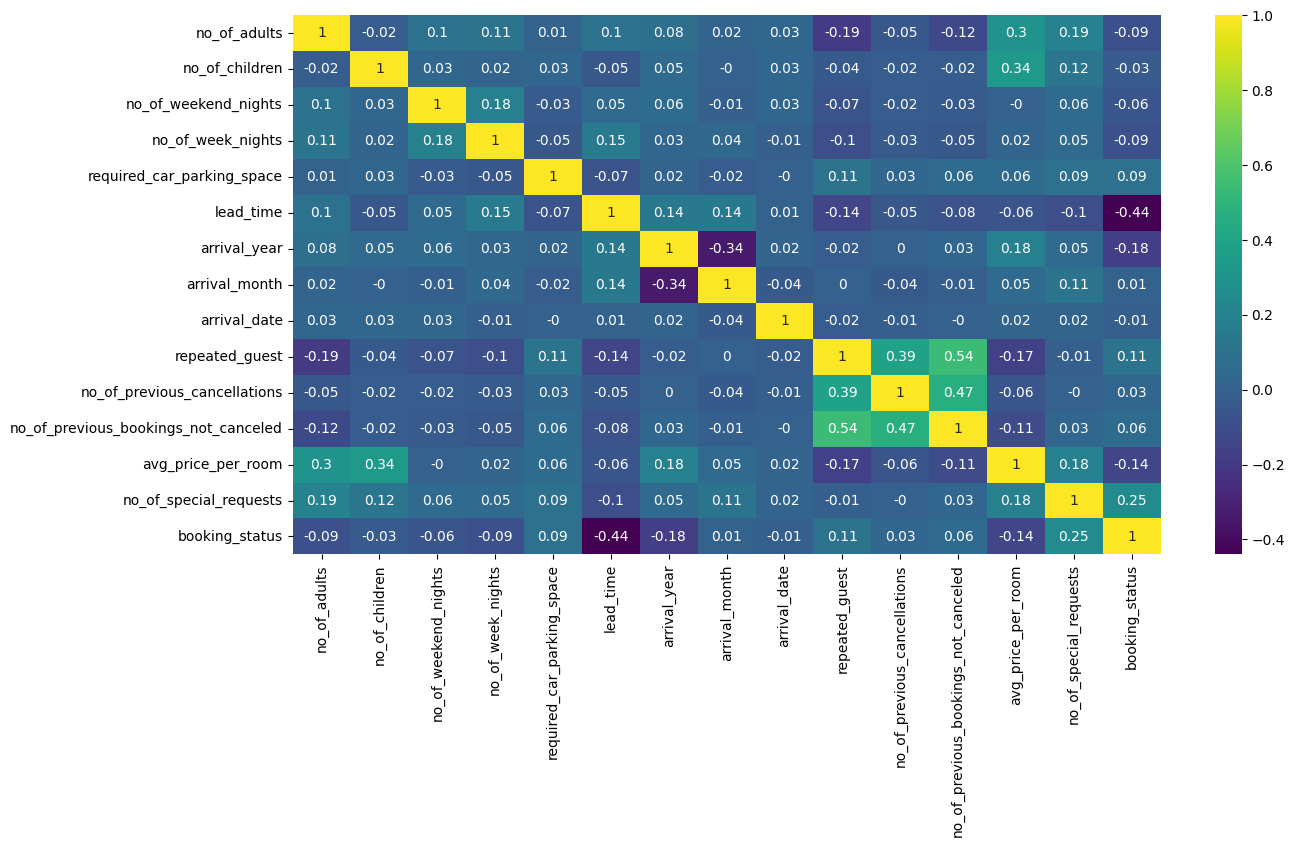

In [23]:
# TODO: we should have booking status in this as that row shows what correlates with what we are interested in
import seaborn as sns
correlation = df.corr(numeric_only = True).round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'viridis')

In [24]:
df['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

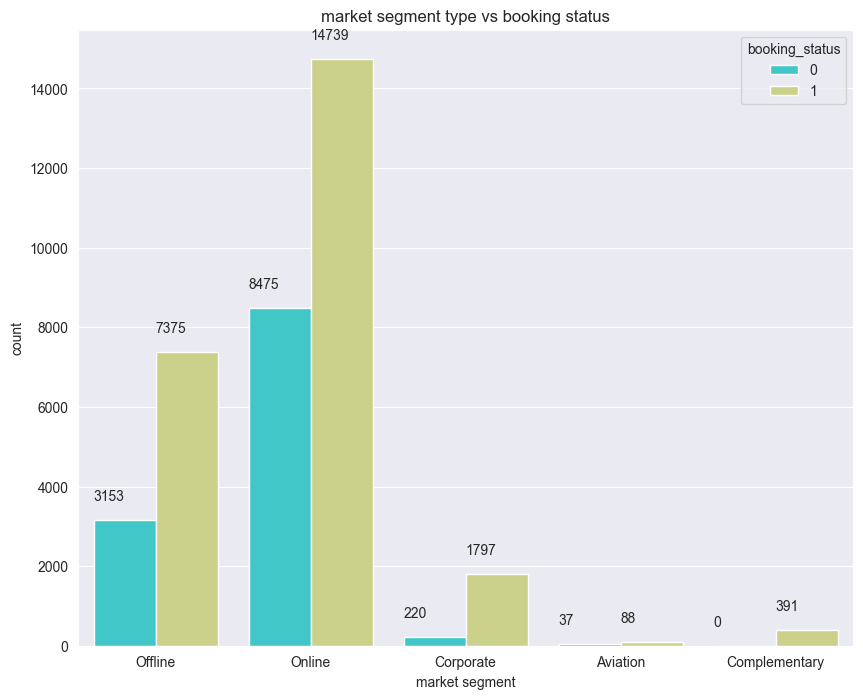

In [25]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax=sns.countplot(data=df,x='market_segment_type',hue='booking_status',palette='rainbow')
plt.title('market segment type vs booking status')
plt.xlabel('market segment')
plt.ylabel('count')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+500))

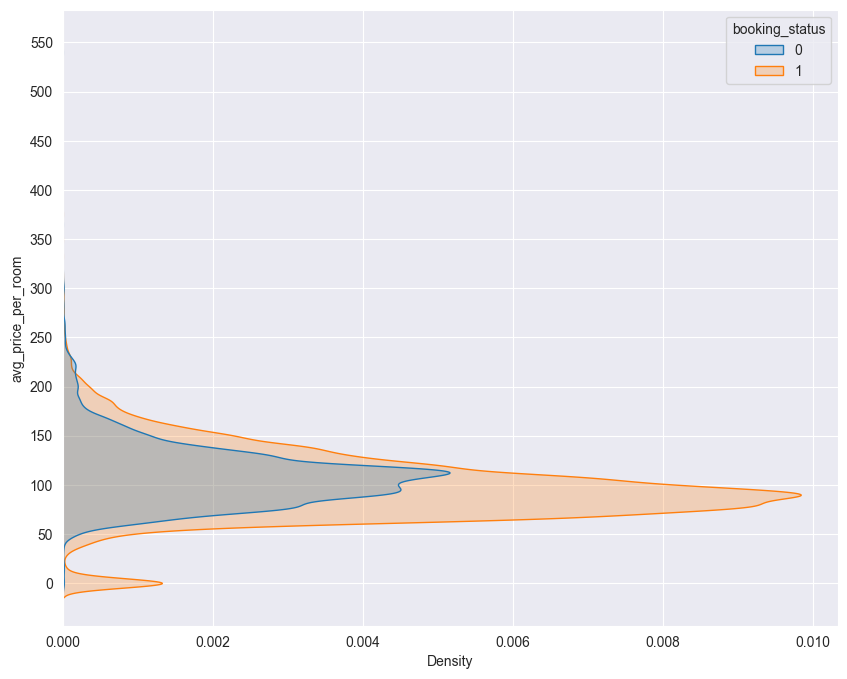

In [26]:
plt.figure(figsize=(10,8))
x=sns.kdeplot(data=df,y='avg_price_per_room',hue='booking_status',fill=True,gridsize=1000)
x.set_yticks(range(0,600,50))
plt.show()

### 3.1 Data Exploration

We see that Online reservations have a high cancellation rate, while corporate and complementary reservations see low cancellation rates

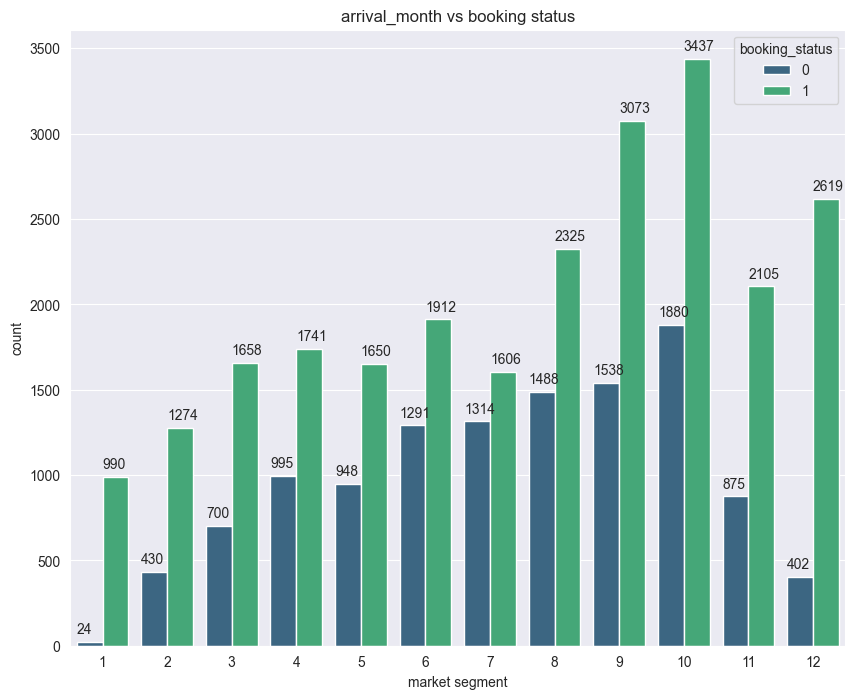

In [27]:
# on the basis of arrival_month 
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax=sns.countplot(data=df,x='arrival_month',hue='booking_status',palette='viridis')
plt.title('arrival_month vs booking status')
plt.xlabel('market segment')
plt.ylabel('count')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+50))

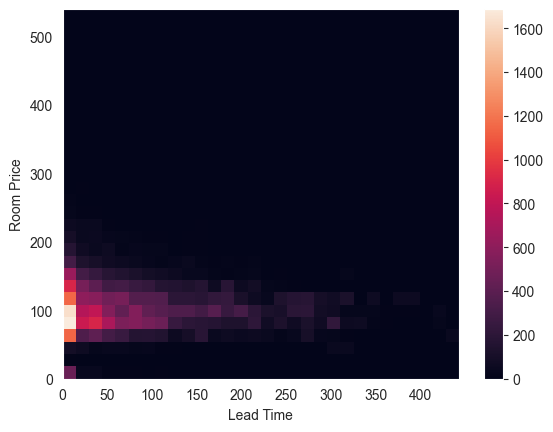

In [28]:
plt.hist2d(x=df.lead_time, y=df.avg_price_per_room, bins=30)
plt.colorbar()
plt.xlabel("Lead Time")
plt.ylabel("Room Price")
plt.show()

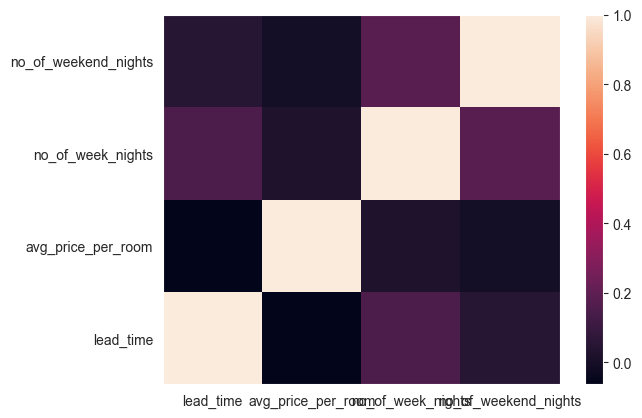

In [29]:
import numpy as np

# plot the correlation matrix 
vars_to_use = ['lead_time', 'avg_price_per_room', 'no_of_week_nights', 'no_of_weekend_nights'] # pick vars
plt.pcolor(df[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()

In [ ]:
sns.violinplot(x="lead_time", y="avg_price_per_room", hue="no_of_week_nights", data=df, 
               split=True, # split across violins
               inner="quart", # show innner stats like mena, IQR, 
               scale="count") # scale the size of the plot by the count within each group

plt.show()

Some graphs from:
https://www.kaggle.com/code/effortno11/beginner-friendly-eda-model-comparison#Data-Analysis